In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score

from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [33]:
data = pd.read_csv(r'data.csv', index_col='Date',)
data.index=pd.to_datetime(data.index)
data

,Bought,Sold,NV,Lost
Date,,,,
2013-01-01,735422368.7,712147000.0,403465.600,2.287190e+07
2013-02-01,657988856.3,640633717.3,347800.550,1.700734e+07
2013-03-01,663373030.9,649168952.2,357794.550,1.384628e+07
2013-04-01,533983791.4,519744979.3,255663.800,1.398315e+07
2013-05-01,493381739.3,481595212.5,196548.400,1.158998e+07
...,...,...,...,...
2021-10-01,514226362.7,506857003.8,316669.565,7.052689e+06
2021-11-01,541704980.8,532236963.9,356965.930,9.111051e+06
2021-12-01,705779288.1,696793547.9,462805.350,8.522935e+06


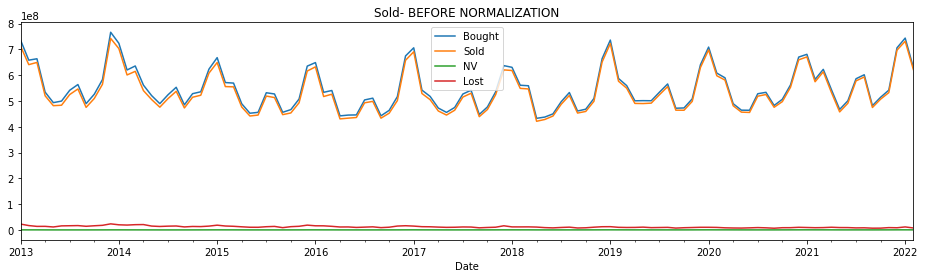

In [9]:
data.plot(figsize=(16,4),legend=True)
plt.title('Sold- BEFORE NORMALIZATION')
plt.show()

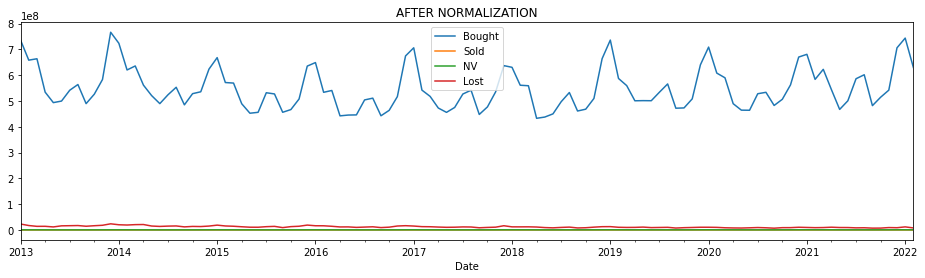

(110, 4)

In [24]:
def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['Sold']=scaler.fit_transform(df['Sold'].values.reshape(-1,1))
    return df

data_norm = normalize_data(data)

data_norm.plot(figsize=(16,4),legend=True)
plt.title('AFTER NORMALIZATION')
plt.show()
data_norm.shape

In [34]:
df = data.filter(['Sold'], axis=1)
df

,Sold
Date,
2013-01-01,712147000.0
2013-02-01,640633717.3
2013-03-01,649168952.2
2013-04-01,519744979.3
2013-05-01,481595212.5
...,...
2021-10-01,506857003.8
2021-11-01,532236963.9
2021-12-01,696793547.9


In [35]:
def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i-seq_len : i, 0])
        y_train.append(stock.iloc[i, 0])
    
    #1 last 22 datapoints are going to be used in test
    X_test = X_train[110:]             
    y_test = y_train[110:]
    
    #2 first 88 datapoints are going to be used in training
    X_train = X_train[:110]           
    y_train = y_train[:110]
    
    #3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    #4 reshape data to input into LSTM models
    X_train = np.reshape(X_train, (110, seq_len, 1))
    
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return [X_train, y_train, X_test, y_test]

In [37]:
#create train, test data
seq_len = 10 #choose sequence length

X_train, y_train, X_test, y_test = load_data(df, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

ValueError: cannot reshape array of size 1000 into shape (110,10,1)

In [15]:
lstm_model = Sequential()

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(1))

lstm_model.summary()

NameError: name 'X_train' is not defined